# CO2 Emission by Vehicles

This dataset captures the details of how CO2 emissions by a vehicle can vary with the different features. The dataset has been taken from Canada Government official open data website. This contains data over a period of 7 years. There are total 7385 rows and 12 columns. 

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Data reading

In [2]:

df=pd.read_csv("CO2 Emissions_Canada.csv")

In [3]:
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


Make= Company of the vehicle

Model= Car model

Vehicle Class= Class of vehicle depending on their utility, capacity and weight

Engine Size = Size of engine used in Litre

Cylinders= Number of cylinders

Transmission = Transmission type with number of gears

Fuel type =Type of Fuel used

Fuel Consumption City=Fuel consumption in city roads (L/100 km)

Fuel Consumption Hwy=Fuel consumption in Hwy roads (L/100 km)

Fuel Consumption Comb=The combined fuel consumption (55% city, 45% highway) is shown in L/100 km

Fuel Consumption Comb mpg =The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)

# Information about dataset

In [4]:
df.shape

(7385, 12)

In [5]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [6]:
df.dtypes

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


# Top 10 & last 10 entries

In [9]:
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [10]:
df.tail(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7375,VOLVO,S90 T6 AWD,MID-SIZE,2.0,4,AS8,Z,11.3,7.5,9.6,29,223
7376,VOLVO,V60 T5,STATION WAGON - SMALL,2.0,4,AS8,Z,10.5,7.1,8.9,32,208
7377,VOLVO,V60 T6 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,11.0,7.4,9.4,30,219
7378,VOLVO,V60 CC T5 AWD,STATION WAGON - SMALL,2.0,4,AS8,Z,10.8,7.7,9.4,30,220
7379,VOLVO,XC40 T4 AWD,SUV - SMALL,2.0,4,AS8,X,10.2,7.5,9.0,31,210
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


# Finding Null values

In [11]:

df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [12]:
df.rename(columns={'Vehicle Class' : 'Vehicle_Class'}, inplace=True)
df.rename(columns={'Fuel Type' : 'Fuel_type'}, inplace=True)

# count of fuel_type & barplot

In [13]:
df['Fuel_type'].value_counts()

X    3637
Z    3202
E     370
D     175
N       1
Name: Fuel_type, dtype: int64

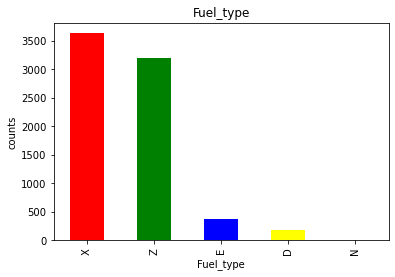

In [14]:
df.Fuel_type.value_counts().plot(kind="bar", title="Fuel_type", color=["red","green", "blue","yellow"])
plt.xlabel("Fuel_type")
plt.ylabel("counts")
plt.show()

In [15]:
#df.duplicated().sum()

In [16]:
#Drop Duplicated data
#df= df.drop_duplicates()
#df.shape

# Checking the  transmission type 

In [17]:
df['Transmission'].value_counts()

AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: Transmission, dtype: int64

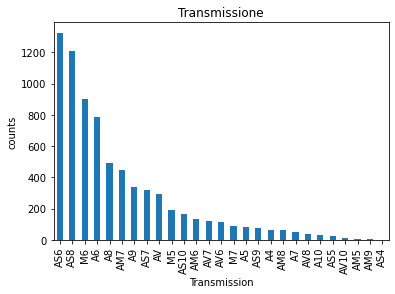

In [18]:
df.Transmission.value_counts().plot(kind="bar", title="Transmissione")
plt.xlabel("Transmission")
plt.ylabel("counts")
plt.show()

# correlation

In [19]:
df.corr()['CO2 Emissions(g/km)'].sort_values()

Fuel Consumption Comb (mpg)        -0.907426
Cylinders                           0.832644
Engine Size(L)                      0.851145
Fuel Consumption Hwy (L/100 km)     0.883536
Fuel Consumption Comb (L/100 km)    0.918052
Fuel Consumption City (L/100 km)    0.919592
CO2 Emissions(g/km)                 1.000000
Name: CO2 Emissions(g/km), dtype: float64

# heatmap for a better understanding of correlated values

<AxesSubplot:>

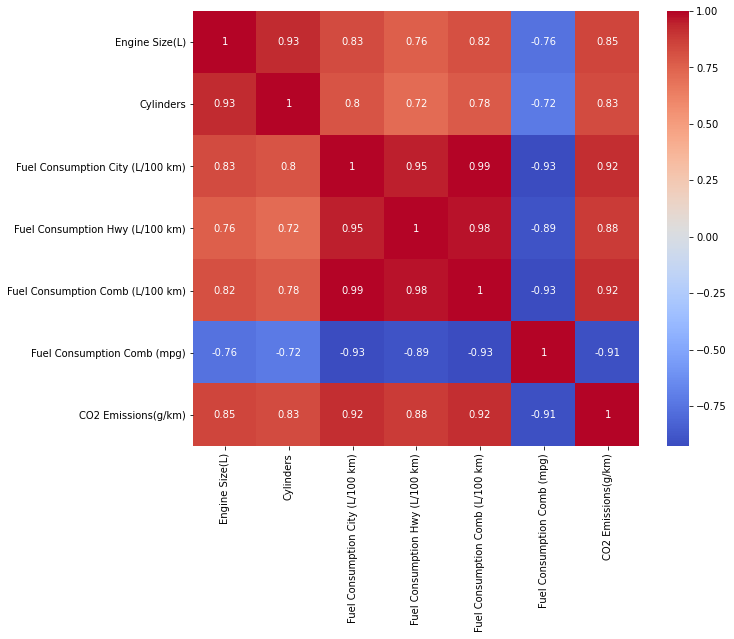

In [20]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

1.all features have a strong positive correlation with CO2 Emissions except FCC(mpg) that has a strong negative correlation with CO2 Emissions

2.there is a storng correlation between the size of the engine and the number of cylinders


C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'FORD'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'BMW'),
  Text(3, 0, 'MERCEDES-BENZ'),
  Text(4, 0, 'PORSCHE'),
  Text(5, 0, 'TOYOTA'),
  Text(6, 0, 'GMC'),
  Text(7, 0, 'AUDI'),
  Text(8, 0, 'NISSAN'),
  Text(9, 0, 'JEEP'),
  Text(10, 0, 'DODGE'),
  Text(11, 0, 'KIA'),
  Text(12, 0, 'HONDA'),
  Text(13, 0, 'HYUNDAI'),
  Text(14, 0, 'MINI'),
  Text(15, 0, 'VOLKSWAGEN'),
  Text(16, 0, 'MAZDA'),
  Text(17, 0, 'LEXUS'),
  Text(18, 0, 'JAGUAR'),
  Text(19, 0, 'CADILLAC'),
  Text(20, 0, 'SUBARU'),
  Text(21, 0, 'VOLVO'),
  Text(22, 0, 'INFINITI'),
  Text(23, 0, 'BUICK'),
  Text(24, 0, 'RAM'),
  Text(25, 0, 'LINCOLN'),
  Text(26, 0, 'MITSUBISHI'),
  Text(27, 0, 'CHRYSLER'),
  Text(28, 0, 'LAND ROVER'),
  Text(29, 0, 'FIAT'),
  Text(30, 0, 'ACURA'),
  Text(31, 0, 'MASERATI'),
  Text(32, 0

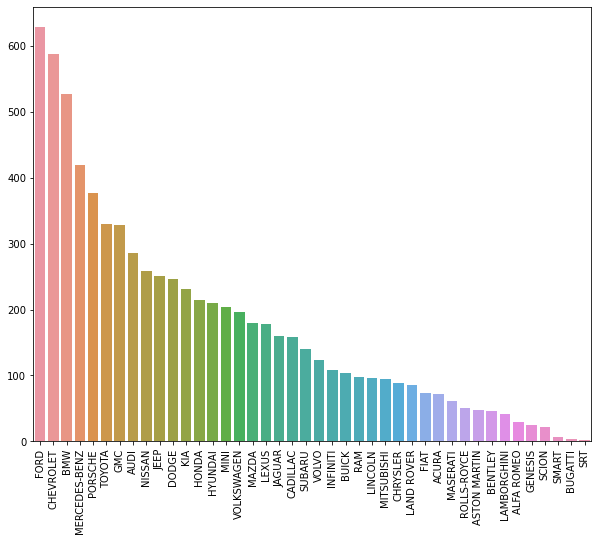

In [21]:
a = df['Make'].value_counts().index
b = df['Make'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(a,b)
plt.xticks(rotation='vertical')

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'SUV - SMALL'),
  Text(1, 0, 'MID-SIZE'),
  Text(2, 0, 'COMPACT'),
  Text(3, 0, 'SUV - STANDARD'),
  Text(4, 0, 'FULL-SIZE'),
  Text(5, 0, 'SUBCOMPACT'),
  Text(6, 0, 'PICKUP TRUCK - STANDARD'),
  Text(7, 0, 'TWO-SEATER'),
  Text(8, 0, 'MINICOMPACT'),
  Text(9, 0, 'STATION WAGON - SMALL'),
  Text(10, 0, 'PICKUP TRUCK - SMALL'),
  Text(11, 0, 'MINIVAN'),
  Text(12, 0, 'SPECIAL PURPOSE VEHICLE'),
  Text(13, 0, 'VAN - PASSENGER'),
  Text(14, 0, 'STATION WAGON - MID-SIZE'),
  Text(15, 0, 'VAN - CARGO')])

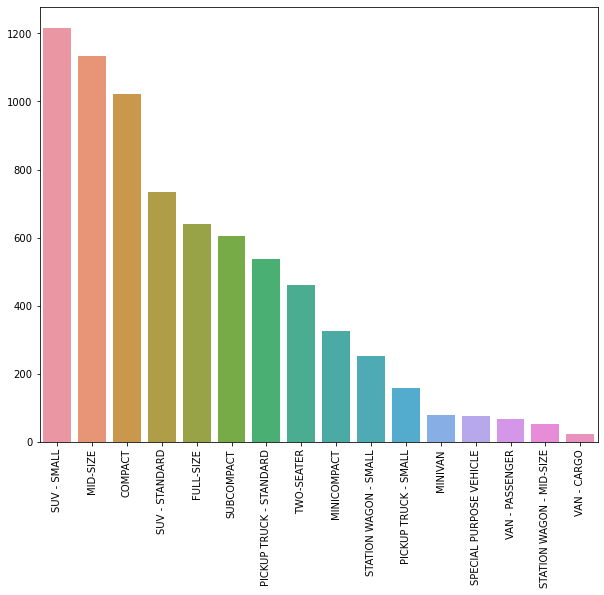

In [22]:
c = df['Vehicle_Class'].value_counts().index
d = df['Vehicle_Class'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(c,d)
plt.xticks(rotation='vertical')

# which vehicle show more emission

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'COMPACT'),
  Text(1, 0, 'SUV - SMALL'),
  Text(2, 0, 'MID-SIZE'),
  Text(3, 0, 'TWO-SEATER'),
  Text(4, 0, 'MINICOMPACT'),
  Text(5, 0, 'SUBCOMPACT'),
  Text(6, 0, 'FULL-SIZE'),
  Text(7, 0, 'STATION WAGON - SMALL'),
  Text(8, 0, 'SUV - STANDARD'),
  Text(9, 0, 'VAN - CARGO'),
  Text(10, 0, 'VAN - PASSENGER'),
  Text(11, 0, 'PICKUP TRUCK - STANDARD'),
  Text(12, 0, 'MINIVAN'),
  Text(13, 0, 'SPECIAL PURPOSE VEHICLE'),
  Text(14, 0, 'STATION WAGON - MID-SIZE'),
  Text(15, 0, 'PICKUP TRUCK - SMALL')])

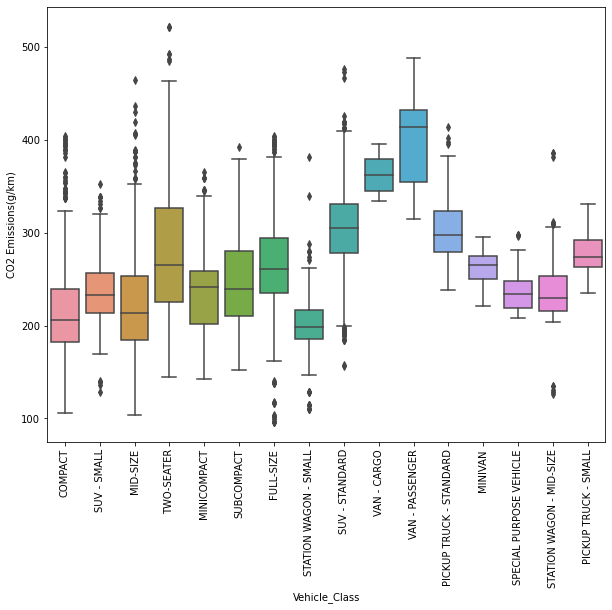

In [23]:
plt.figure(figsize = (10,8))
sns.boxplot(x="Vehicle_Class", y="CO2 Emissions(g/km)", data=df)
plt.xticks(rotation = 'vertical')


We can learn from this that van's have more CO2 emissions

# check for maximum fuel consumption

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


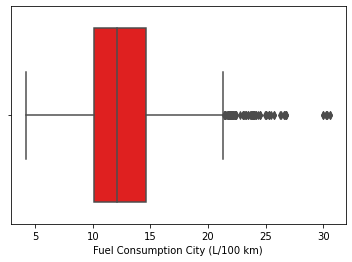

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


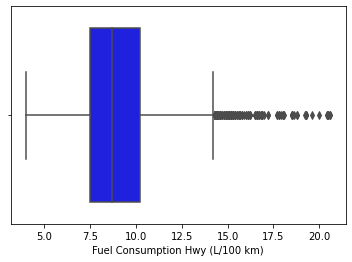

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


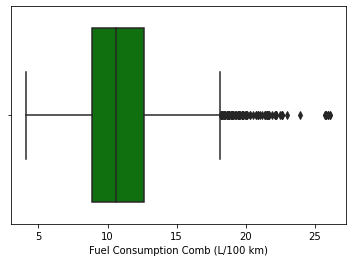

In [24]:
sns.boxplot(df['Fuel Consumption City (L/100 km)'], color = "red")
plt.show()
sns.boxplot(df['Fuel Consumption Hwy (L/100 km)'],color= "Blue")
plt.show()
sns.boxplot(df['Fuel Consumption Comb (L/100 km)'], color = 'green')
plt.show()


# Average CO2 emission with fuel type 

Average CO2 Emission Per Fuel_type


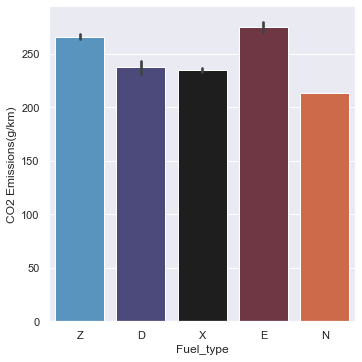

In [25]:
sns.set()
print("Average CO2 Emission Per Fuel_type")
g = sns.catplot(x ="Fuel_type", y ="CO2 Emissions(g/km)", data = df, kind = "bar", palette="icefire")
plt.show()

Ethanol typically is the most efficient fuel type

# Checking fuel consumption on highway by type


Average CO2 Emission Per Fuel_type


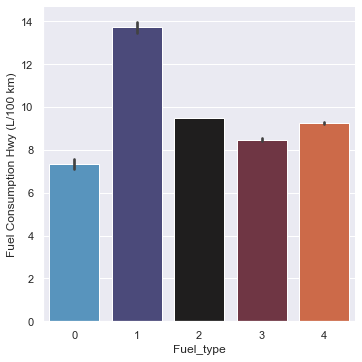

([<matplotlib.axis.XTick at 0xa457130>,
 [Text(0, 0, 'Premium Gasoline'),
  Text(1, 0, 'Diesel'),
  Text(2, 0, 'Regular Gasoline'),
  Text(3, 0, 'Ethanol'),
  Text(4, 0, 'Natural Gas')])

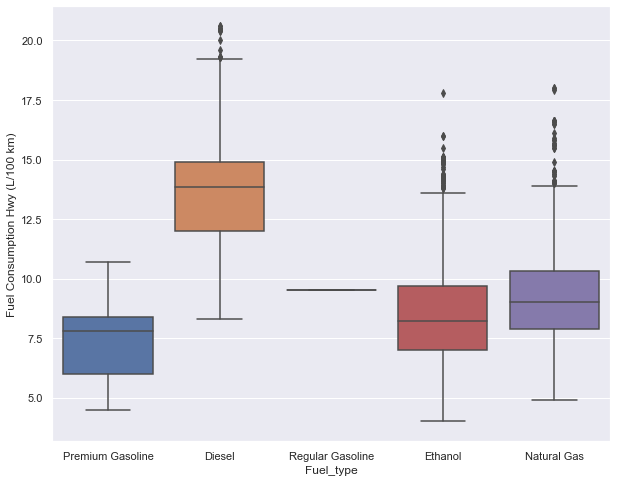

In [41]:
sns.set()
print("Average CO2 Emission Per Fuel_type")
g = sns.catplot(x ="Fuel_type", y ="Fuel Consumption Hwy (L/100 km)", data = df, kind = "bar", palette="icefire")
plt.show()


plt.figure(figsize = (10,8))
sns.boxplot(y = 'Fuel Consumption Hwy (L/100 km)', x = 'Fuel_type', data = df)
plt.xticks([0,1,2,3,4],['Premium Gasoline','Diesel','Regular Gasoline','Ethanol','Natural Gas'])

In [28]:
df.drop('Make', axis = 1, inplace = True)
df.drop('Model', axis = 1, inplace = True)
df.drop('Vehicle_Class', axis = 1, inplace = True)
#df.drop('Transmission', axis = 1, inplace = True)

In [29]:
df

,Engine Size(L),Cylinders,Transmission,Fuel_type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...
7380,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [30]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

In [31]:
encode.fit(df.Fuel_type.drop_duplicates()) 
df.Fuel_type = encode.transform(df.Fuel_type)

encode.fit(df.Transmission.drop_duplicates())
df.Transmission = encode.transform(df.Transmission)

In [32]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [33]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 0)

# linear regression

In [35]:
reg = LinearRegression()
reg.fit(xTrain, yTrain)
regYpred = reg.predict(xTest)
print(reg.score(xTest,yTest))

0.9108089490746143


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(xTrain, yTrain)
dtrYpred = dtr.predict(xTest)
dtrScore = r2_score(yTest,dtrYpred)
print('Score: %.3f' % dtrScore)

Score: 0.996


# Random forest

In [37]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators = 20, random_state = 0)
rfr.fit(xTrain, yTrain)
rfrYpred = rfr.predict(xTest)
rfrScore = r2_score(yTest,rfrYpred)
print('Score: %.3f' % rfrScore)

Score: 0.996


# Conclusion

1.A56 is the most occuring transmission type 

2.All features have a strong positive correlation with CO2 Emissions except FCC(mpg) that has a strong negative correlation with CO2 Emissions

3.There is a storng correlation between the size of the engine and the number of cylinders

4.Passenger VANS emitts the most Co2 in the vechicle class

5.In City maximum fuel consumsion 

6.The Fuel type E emittes the most CO2

7.Ethanol typically is the most efficient fuel type 

8.By using Linear Regression Model we achieved 91% accuracy. Using Decision Tree model & Random Forest model we achieved 99.6% which is higher than that of linear Regression Model.